# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
import time as time
output_csv_file = "output_data/list_of_cities.csv"

In [20]:

latitude_range = (-90,90)
longitude_range = (-180,180)

latitude_longitude_sample = []

latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1400)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1400)

latitude_longitude_sample = zip(latitude, longitude)

cities = []

# To utilize "citypy" for optaining a corresponding city name -
# Each randomly selected latitude and longitude cordinate in sample (latitude_longitude_sample) 
# is cross referenced to a city name and appended to the "cities" list.  

for latitude_longitude in latitude_longitude_sample:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    if city not in cities:
        cities.append(city)
        


# Generate Cities List

In [21]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,albany
1,cape town
2,dikson
3,porto novo
4,kapaa


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [22]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# response = requests.get(query_url + "London").json() 

In [23]:
# to list out data elements provided in the Open Weather application API

name_list = []
id_list = []
country_list = []
lon_list = []
lat_list = []
temp_list = []
speed_list = []
humidity_list = []
clouds_list = []
dates_list = []


In [24]:
# API call for each city to obtain Name, ID, Country, Longitude, Latitude, Current Temperature, Wind Speed, Humidity,
#   and Cloudiness.   

for city in cities:
    
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    
    
    try: 
        city_id = weather_json['id']
        id_list.append(city_id)
        
        city_name = weather_json['name']
        name_list.append(city_name)
        
        city_country = weather_json['sys']['country']
        country_list.append(city_country)
        
        city_lon = weather_json['coord']['lon']
        lon_list.append(city_lon)
        
        city_lat = weather_json['coord']['lat']
        lat_list.append(city_lat)
        
        city_temp = weather_json['main']['temp_max']
        temp_list.append(city_temp)
        
        city_speed = weather_json['wind']['speed']
        speed_list.append(city_speed)
        
        city_humidity = weather_json['main']['humidity']
        humidity_list.append(city_humidity)
                
        city_clouds = weather_json['clouds']['all']
        clouds_list.append(city_clouds)   
        
        city_dates = weather_json['dt']
        dates_list.append(city_dates) 
            
        print(f"City Name: {city_name} - City ID: {city_id}")
           
    except:
        print("Record does not exits")
        

City Name: Albany - City ID: 5106841
City Name: Cape Town - City ID: 3369157
City Name: Dikson - City ID: 1507390
City Name: Porto-Novo - City ID: 2392087
City Name: Kapaa - City ID: 5848280
City Name: Jamestown - City ID: 5122534
City Name: Alice Springs - City ID: 2077895
City Name: kimparana - City ID: 2455456
City Name: Mar del Plata - City ID: 3430863
Record does not exits
City Name: Katsuura - City ID: 2112309
City Name: Ephrata - City ID: 5188815
City Name: Deputatsky - City ID: 2028164
City Name: Hobart - City ID: 2163355
City Name: Ürümqi - City ID: 1529102
City Name: Gulmarg - City ID: 1277085
City Name: Coahuayana Viejo - City ID: 4013679
City Name: Busselton - City ID: 2075265
City Name: Punta Arenas - City ID: 3874787
City Name: Vaini - City ID: 4032243
City Name: Nanortalik - City ID: 3421765
City Name: Ţahţā - City ID: 347634
City Name: Carutapera - City ID: 3402648
City Name: Bukama - City ID: 217834
City Name: Takoradze - City ID: 2294915
City Name: Conceição do Aragua

Record does not exits
City Name: Killarney - City ID: 2963370
City Name: Machalí - City ID: 3881102
City Name: Itororó - City ID: 3460542
City Name: Nuuk - City ID: 3421319
City Name: Kasongo-Lunda - City ID: 2315026
City Name: Penzance - City ID: 2640377
City Name: Severo-Kuril'sk - City ID: 2121385
City Name: Codrington - City ID: 2171099
City Name: Burnie - City ID: 2173125
City Name: Saint George - City ID: 5546220
City Name: Ubari - City ID: 2219235
City Name: Čakovec - City ID: 3202888
City Name: Kargasok - City ID: 1504382
City Name: Raudeberg - City ID: 3146487
City Name: Yumen - City ID: 1528998
Record does not exits
City Name: Sampit - City ID: 1628884
City Name: Arraial do Cabo - City ID: 3471451
City Name: Lae - City ID: 2092740
City Name: Nome - City ID: 5870133
City Name: Mangan - City ID: 1263776
City Name: Chiredzi - City ID: 893485
City Name: Pacific Grove - City ID: 5380437
City Name: Halifax - City ID: 6324729
City Name: Marsh Harbour - City ID: 3571913
City Name: Te

City Name: Manzhouli - City ID: 2035836
City Name: Francavilla al Mare - City ID: 3176605
City Name: New Ulm - City ID: 5039173
City Name: Turukhansk - City ID: 1488903
City Name: Zheleznodorozhnyy - City ID: 463355
City Name: Kutum - City ID: 371745
City Name: Bara - City ID: 2347758
City Name: Marzuq - City ID: 72181
City Name: Saint-Pierre - City ID: 935214
City Name: Bytów - City ID: 3101943
City Name: Krasnaya Gora - City ID: 542788
City Name: Hamilton - City ID: 4513583
City Name: Cabedelo - City ID: 3404558
City Name: Sørland - City ID: 3137469
City Name: Ţaga - City ID: 665628
City Name: Husavik - City ID: 2629833
City Name: Nālūt - City ID: 2214432
City Name: Newport - City ID: 2641598
City Name: Waitati - City ID: 2179825
City Name: Tabasalu - City ID: 588454
City Name: Novodolinskiy - City ID: 1520627
City Name: Baoning - City ID: 1992517
City Name: Sioux Lookout - City ID: 6148373
Record does not exits
City Name: Mason City - City ID: 4866445
City Name: Adré - City ID: 2456

In [25]:
cities_df_all = pd.DataFrame({"City Name": name_list,"City ID": id_list,"Country": country_list,"City Longitude": lon_list, "City Latitude": lat_list,
                         "City Wind Speed":speed_list, "City Wind Speed": speed_list, "City Max Temperature": temp_list, "City Humidity": humidity_list,
                         "City Cloudiness": clouds_list, "City Dates": dates_list})

print("---------------------------------------")
print(f" Data Retrieval Complete - {len(name_list)} cities")
print("---------------------------------------")

cities_df_all.count()

---------------------------------------
 Data Retrieval Complete - 536 cities
---------------------------------------


City Name               536
City ID                 536
Country                 536
City Longitude          536
City Latitude           536
City Wind Speed         536
City Max Temperature    536
City Humidity           536
City Cloudiness         536
City Dates              536
dtype: int64

In [46]:
# #Check to ensure the final number of cites is 500 or geater 
# print(f" The sample data contains {len(name_list)} cities ")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# to diplay (combine) all data (lists) into a single DataFrame format   

cities_df_all = pd.DataFrame({"City Name": name_list,"City ID": id_list,"Country": country_list,"City Longitude": lon_list, "City Latitude": lat_list,
                         "City Wind Speed":speed_list, "City Wind Speed": speed_list, "City Max Temperature": temp_list,"City Humidity": humidity_list,
                         "City Cloudiness": clouds_list, "City Dates": dates_list})
cities_df_all.head()

,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
0,Albany,5106841,US,-73.9662,42.6001,1.99,72.68,61,95,1621955789
1,Cape Town,3369157,ZA,18.4232,-33.9258,6.44,66.09,64,20,1621956082
2,Dikson,1507390,RU,80.5464,73.5069,6.29,23.50,87,11,1621956107
3,Porto-Novo,2392087,BJ,2.6036,6.4965,10.74,87.62,60,92,1621956067
4,Kapaa,5848280,US,-159.3190,22.0752,3.83,71.58,88,75,1621956072


In [76]:
# To export all city information into a CSV file, without an index
cities_df_all.to_csv("output_data/city_data_all.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.  

As outlined below, there are no cities in the above sample data with humidity reported as greater than 100%

In [77]:
# Check to ensure city humidity is not reported as greater than 100% for any one particular city.  
cities_df_all.describe()

,City ID,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates
count,5.360000e+02,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,2.605158e+06,24.680620,20.432116,8.824291,66.544384,66.486940,57.173507,1.621956e+09
std,1.664084e+06,91.304556,33.886433,6.660941,19.080680,22.431366,37.602417,2.764872e+02
min,6.481400e+04,-179.166700,-54.800000,0.000000,23.500000,4.000000,0.000000,1.621956e+09
25%,1.518843e+06,-54.826200,-6.515100,4.160000,52.447500,55.000000,20.000000,1.621956e+09
50%,2.171282e+06,26.789300,23.467500,7.000000,69.080000,71.000000,69.000000,1.621957e+09
75%,3.470466e+06,108.347050,50.037550,11.860000,80.785000,83.000000,94.000000,1.621957e+09
max,1.072286e+07,179.316700,78.218600,50.760000,112.780000,100.000000,100.000000,1.621957e+09


In [78]:
# Additional check to ensure city humidity is not reported as greater than 100% for any one particular city.  
cities_humidity_greater_100per = cities_df_all.loc[cities_df_all["City Humidity"] > 100]
cities_humidity_greater_100per

,City Name,City ID,Country,City Longitude,City Latitude,City Wind Speed,City Max Temperature,City Humidity,City Cloudiness,City Dates


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

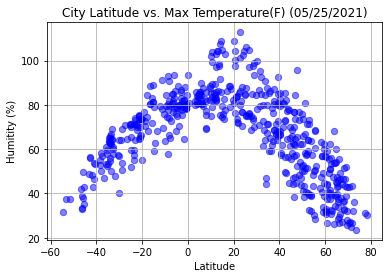

In [96]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Max Temperature"]
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
plt.title(f"City Latitude vs. Max Temperature(F) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

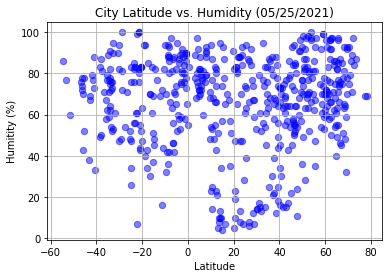

In [98]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Humidity"]
plt.xlabel('Latitude')
plt.ylabel('Humitity (%)')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

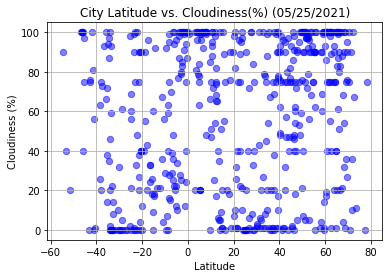

In [99]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Cloudiness"]
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness(%) ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

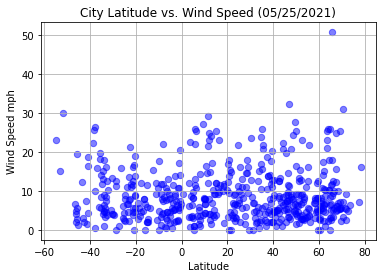

In [103]:
date = "05/25/2021"

x_values = cities_df_all["City Latitude"]
y_values = cities_df_all["City Wind Speed"]
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.scatter(x_values, y_values, marker = "o", s = 40, c = "blue", alpha = 0.50)
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression